In [ ]:
# # Install kaggle
# !pip install kaggle

# # Upload kaggle.json ke Colab (jika belum dilakukan sebelumnya)

# # Unduh dataset
!kaggle datasets download -d rezkyyayang/kepuasanhidupkomuter


Dataset URL: https://www.kaggle.com/datasets/rezkyyayang/kepuasanhidupkomuter
License(s): other
  0% 0.00/7.20k [00:00<?, ?B/s]
100% 7.20k/7.20k [00:00<00:00, 9.90MB/s]


In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


# readable figures
pd.set_option('float_format', '{:f}'.format)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


# readable figures
pd.set_option('float_format', '{:f}'.format)

In [ ]:
import zipfile
import os

# Nama file zip
zip_file = 'kepuasanhidupkomuter.zip'

# Ekstrak file zip
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

# List file yang sudah diekstrak
extracted_files = os.listdir()

# Memuat dataset CSV
csv_file = [file for file in extracted_files if file.endswith('.csv')][0]
df = pd.read_csv(csv_file)

# Tampilkan lima baris pertama dataset
df


,No. Responden,A.1,A.2,A.3,A.4,A.5,A.6,B.1,B.2,C.1,...,E.3,F.1,F.2,F.3,F.4,F.5,F.6,F.7,F.8,Kepuasan Hidup
0,1,1,30,1,3,1,1,4,4,1,...,5,4,3,4,4,4,3,3,3,Sangat Tidak Puas
1,2,1,40,1,3,1,5,4,5,2,...,4,4,3,4,4,5,4,4,5,Sangat Tidak Puas
2,3,1,38,1,3,1,5,4,4,1,...,5,5,4,4,3,3,3,3,4,Sangat Tidak Puas
3,4,1,27,2,3,1,5,5,4,2,...,4,4,5,5,4,3,4,5,4,Sangat Tidak Puas
4,5,2,28,2,3,1,5,5,5,3,...,4,4,4,5,3,4,5,5,4,Sangat Tidak Puas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,1,30,1,3,1,4,5,4,2,...,4,2,3,3,2,5,2,3,2,Sangat Puas
380,381,1,45,1,3,1,1,5,4,2,...,5,4,4,4,4,3,3,3,3,Sangat Tidak Puas
381,382,1,38,1,2,1,5,3,3,1,...,4,3,3,3,3,2,3,3,3,Biasa
382,383,1,40,1,3,1,2,4,5,1,...,4,3,2,3,2,2,3,3,3,Biasa


No. Responden
Nomor responden

A.1
Gender

A.2
Age

A.3
Marital status

A.4
Educational background

A.5
Religion

A.6
Occupation

B.1
Housing: Affordability of housing costs

B.2
Housing: House eligibility

C.1
Dependency ratio: Number of working family members

C.2
Dependency ratio: Number of not working family members

C.3
Dependency ratio: family members

C.4
Dependency ratio: dependency ratio

D.1
Income: Income as a commuter is more bigger

D.2
Income: Income as a commuter is worthy

D.3
Income: Work time compliance with income

D.4
Income: Income per month (IDR)

D.5
Income: Income per month (USD)

E.1
Accessibility of Destination City: Ease of transportation mode

E.2
Accessibility of Destination City: Comfort travel to work locations

E.3
Accessibility of Destination City: Fairness travel time to work location

F.1
Quality of life: Your life will be much better if you work not become a commuter

F.2
Quality of life: You don't have enough time to do social interaction in your neighborhood

F.3
Quality of life: Your quality as a parent is disturbed because you do not have enough time to interact with your child

F.4
Quality of life: You don't have time to think about yourself

F.5
Quality of life: Your family life is disrupted because you do not have enough time to interact with your partner

F.6
Quality of life: Your overall life satisfaction as a commuter is reduced because you no longer have much time

F.7
Quality of life: You feel that you have individuals stress with activities as a commuter

F.8
Quality of life: Even though your work is within reasonable limits but the time you allocate to travel as a commuter

Kepuasan Hidup
dengan 3 label= sangat puas, biasa, dan sangat tidak puas

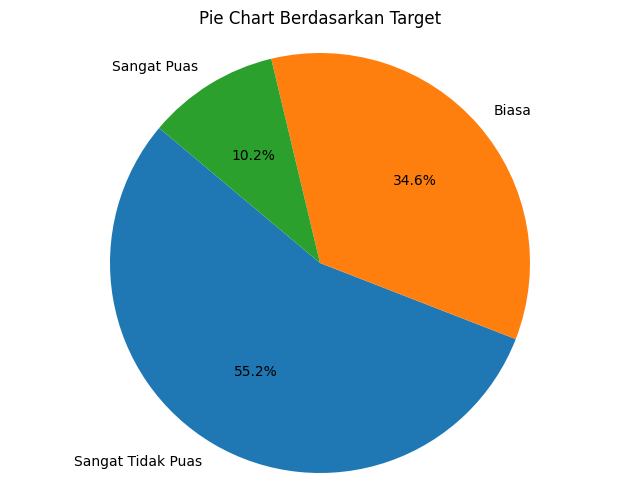

In [ ]:
target_counts = df['Kepuasan Hidup'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Berdasarkan Target')
plt.axis('equal')  # Memastikan lingkaran menjadi lingkaran, bukan elips
plt.show()


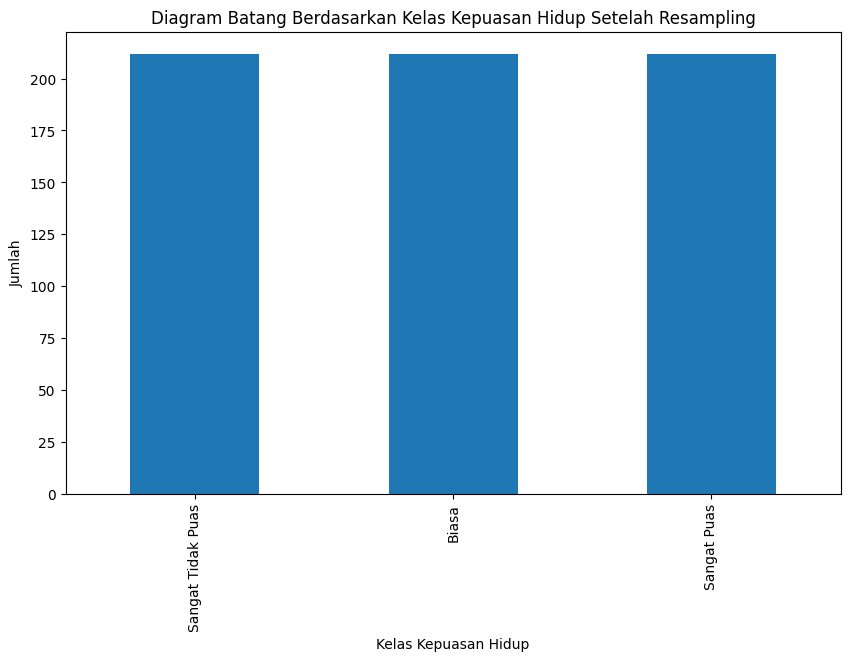

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Kepuasan Hidup', axis=1)
y = df['Kepuasan Hidup']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Kepuasan Hidup'] = y_resampled

plt.figure(figsize=(10, 6))
df_resampled['Kepuasan Hidup'].value_counts().plot(kind='bar')
plt.xlabel('Kelas Kepuasan Hidup')
plt.ylabel('Jumlah')
plt.title('Diagram Batang Berdasarkan Kelas Kepuasan Hidup Setelah Resampling')
plt.show()

df=df_resampled


In [ ]:
mapping = {'Sangat Tidak Puas': 1, 'Biasa': 2, 'Sangat Puas': 3}
df['Kepuasan Hidup'] = df['Kepuasan Hidup'].map(mapping)


In [ ]:
nan = df.isna().sum()
print(nan)

No. Responden     0
A.1               0
A.2               0
A.3               0
A.4               0
A.5               0
A.6               0
B.1               0
B.2               0
C.1               0
C.2               0
C.3               0
C.4               0
D.1               0
D.2               0
D.3               0
D.4               0
D.5               0
E.1               0
E.2               0
E.3               0
F.1               0
F.2               0
F.3               0
F.4               0
F.5               0
F.6               0
F.7               0
F.8               0
Kepuasan Hidup    0
dtype: int64


In [ ]:
duplikat = df[df.duplicated()]
print(duplikat)

     No. Responden  A.1  A.2  A.3  A.4  A.5  A.6  B.1  B.2  C.1  ...  E.3  \
427             45    1   35    1    5    1    4    5    5    2  ...    3   

     F.1  F.2  F.3  F.4  F.5  F.6  F.7  F.8  Kepuasan Hidup  
427    3    3    2    2    2    4    3    4               2  

[1 rows x 30 columns]


In [ ]:
#Drop Irrelevant Data untuk variabel X

data = df.drop(['No. Responden'], axis=1)
data

,A.1,A.2,A.3,A.4,A.5,A.6,B.1,B.2,C.1,C.2,...,E.3,F.1,F.2,F.3,F.4,F.5,F.6,F.7,F.8,Kepuasan Hidup
0,1,30,1,3,1,1,4,4,1,1,...,5,4,3,4,4,4,3,3,3,1
1,1,40,1,3,1,5,4,5,2,2,...,4,4,3,4,4,5,4,4,5,1
2,1,38,1,3,1,5,4,4,1,2,...,5,5,4,4,3,3,3,3,4,1
3,1,27,2,3,1,5,5,4,2,2,...,4,4,5,5,4,3,4,5,4,1
4,2,28,2,3,1,5,5,5,3,2,...,4,4,4,5,3,4,5,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,1,46,1,1,1,4,4,4,1,1,...,3,2,2,2,2,2,3,2,2,3
632,1,44,1,2,1,4,4,4,1,1,...,3,2,2,2,2,2,3,2,2,3
633,1,43,1,2,1,4,4,4,1,2,...,3,2,2,2,2,2,3,2,2,3
634,1,31,1,3,1,2,4,4,1,0,...,3,2,2,2,2,2,3,2,3,3


**PREPOSESSING**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
nilai_min = data.min()
nilai_max = data.max()
print("Nilai Minimum dari Setiap Kolom:")
print(nilai_min)

print("\nNilai Maksimum dari Setiap Kolom:")
print(nilai_max)

Nilai Minimum dari Setiap Kolom:
A.1                   1.000000
A.2                  18.000000
A.3                   1.000000
A.4                   1.000000
A.5                   1.000000
A.6                   1.000000
B.1                   2.000000
B.2                   2.000000
C.1                   1.000000
C.2                   0.000000
C.3                   1.000000
C.4                   1.000000
D.1                   2.000000
D.2                   2.000000
D.3                   2.000000
D.4              200000.000000
D.5                  14.290000
E.1                   2.000000
E.2                   1.000000
E.3                   1.000000
F.1                   1.000000
F.2                   1.000000
F.3                   1.000000
F.4                   1.000000
F.5                   1.000000
F.6                   1.000000
F.7                   1.000000
F.8                   1.000000
Kepuasan Hidup        1.000000
dtype: float64

Nilai Maksimum dari Setiap Kolom:
A.1               

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.drop('Kepuasan Hidup', axis=1))
# Konversi scaled_data kembali ke DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.drop('Kepuasan Hidup', axis=1).columns)
scaled_df

,A.1,A.2,A.3,A.4,A.5,A.6,B.1,B.2,C.1,C.2,...,E.2,E.3,F.1,F.2,F.3,F.4,F.5,F.6,F.7,F.8
0,0.000000,0.315789,0.000000,0.400000,0.000000,0.000000,0.666667,0.666667,0.000000,0.200000,...,0.750000,1.000000,0.750000,0.500000,0.750000,0.750000,0.750000,0.500000,0.500000,0.500000
1,0.000000,0.578947,0.000000,0.400000,0.000000,1.000000,0.666667,1.000000,0.250000,0.400000,...,1.000000,0.750000,0.750000,0.500000,0.750000,0.750000,1.000000,0.750000,0.750000,1.000000
2,0.000000,0.526316,0.000000,0.400000,0.000000,1.000000,0.666667,0.666667,0.000000,0.400000,...,0.750000,1.000000,1.000000,0.750000,0.750000,0.500000,0.500000,0.500000,0.500000,0.750000
3,0.000000,0.236842,0.250000,0.400000,0.000000,1.000000,1.000000,0.666667,0.250000,0.400000,...,1.000000,0.750000,0.750000,1.000000,1.000000,0.750000,0.500000,0.750000,1.000000,0.750000
4,1.000000,0.263158,0.250000,0.400000,0.000000,1.000000,1.000000,1.000000,0.500000,0.400000,...,1.000000,0.750000,0.750000,0.750000,1.000000,0.500000,0.750000,1.000000,1.000000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.000000,0.736842,0.000000,0.000000,0.000000,0.750000,0.666667,0.666667,0.000000,0.200000,...,0.500000,0.500000,0.250000,0.250000,0.250000,0.250000,0.250000,0.500000,0.250000,0.250000
632,0.000000,0.684211,0.000000,0.200000,0.000000,0.750000,0.666667,0.666667,0.000000,0.200000,...,0.500000,0.500000,0.250000,0.250000,0.250000,0.250000,0.250000,0.500000,0.250000,0.250000
633,0.000000,0.657895,0.000000,0.200000,0.000000,0.750000,0.666667,0.666667,0.000000,0.400000,...,0.500000,0.500000,0.250000,0.250000,0.250000,0.250000,0.250000,0.500000,0.250000,0.250000
634,0.000000,0.342105,0.000000,0.400000,0.000000,0.250000,0.666667,0.666667,0.000000,0.000000,...,0.500000,0.500000,0.250000,0.250000,0.250000,0.250000,0.250000,0.500000,0.250000,0.500000


Korelasi dengan kolom target:
Kepuasan Hidup    1.000000
A.2               0.155962
B.2              -0.026466
C.1              -0.040396
C.4              -0.052270
A.5              -0.072003
A.6              -0.072276
C.3              -0.102563
E.3              -0.115932
A.4              -0.124086
A.3              -0.126080
D.3              -0.135165
E.1              -0.140465
D.2              -0.146715
B.1              -0.148920
D.4              -0.162317
D.5              -0.162317
E.2              -0.170463
C.2              -0.188770
D.1              -0.205916
A.1              -0.319167
F.2              -0.400481
F.6              -0.414805
F.5              -0.454301
F.4              -0.471706
F.8              -0.479349
F.7              -0.504499
F.3              -0.534550
F.1              -0.966180
Name: Kepuasan Hidup, dtype: float64


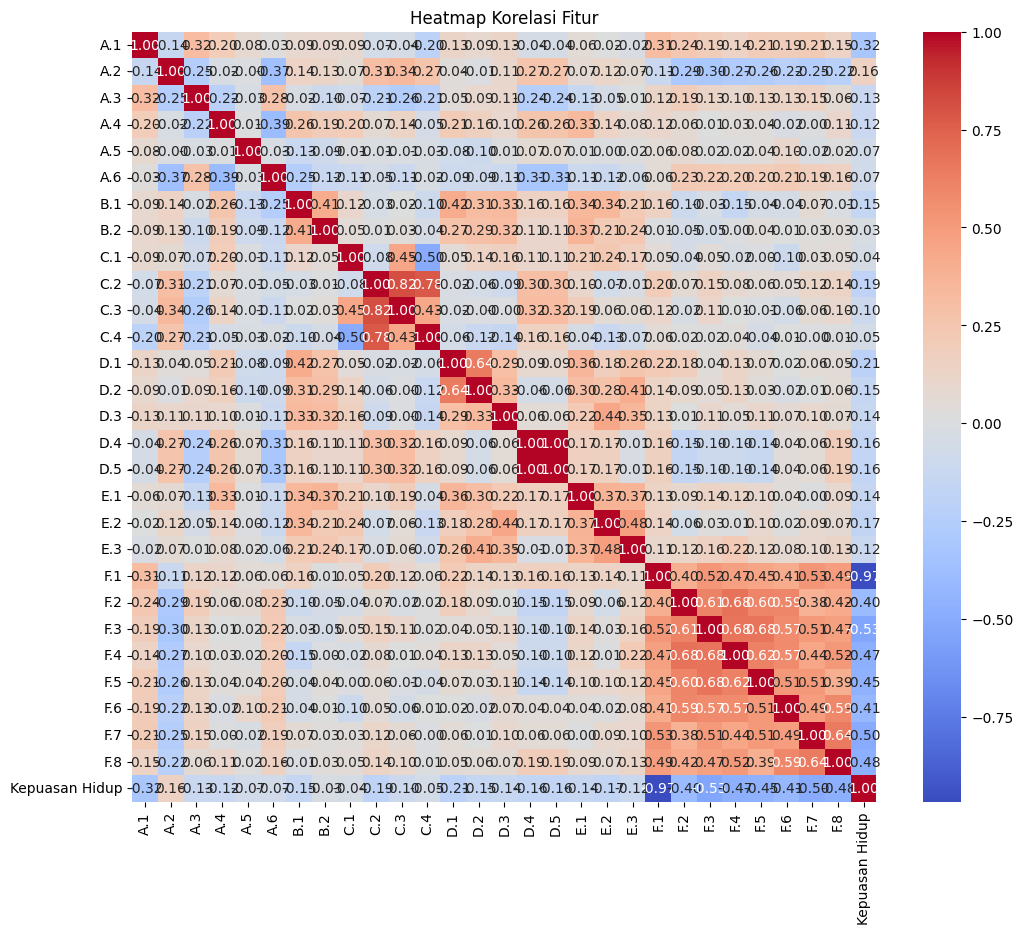

In [ ]:
# Tambahkan kembali kolom target ke hasil scaling
scaled_df['Kepuasan Hidup'] = data['Kepuasan Hidup'].values

correlation_matrix = scaled_df.corr()

# Ambil korelasi dengan kolom target
correlation_with_target = correlation_matrix['Kepuasan Hidup'].sort_values(ascending=False)

# Tampilkan korelasi dengan kolom target
print("Korelasi dengan kolom target:")
print(correlation_with_target)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()


**EKSTRAKSI**

In [ ]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 583.9 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=0227cebc80b441eab8b2843b588a2eb36bb92399b65aed6e3ff1fa254362b977
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [ ]:
from factor_analyzer import FactorAnalyzer
from scipy.stats import bartlett

###Hipotesis Bartlett test

- Hipotesis Nol (H0): Varians dari semua kelompok atau sampel adalah sama.

- Hipotesis Alternatif (H1): Setidaknya ada satu kelompok atau sampel yang memiliki varians berbeda.

In [ ]:
# Perform Bartlett's test for all features simultaneously
bartlett_test_statistic, bartlett_p_value = bartlett(*scaled_df.values.T)

# Print the results
print("Bartlett's Test Results:")
print(f"Test Statistic: {bartlett_test_statistic}")
print(f"p-value: {bartlett_p_value}")

# Jika nilai p dari uji Bartlett signifikan (biasanya p < 0.05),
#kita menolak hipotesis nol dan menyimpulkan bahwa ada cukup variabilitas dalam data untuk analisis faktor.

Bartlett's Test Results:
Test Statistic: 8114.332430558408
p-value: 0.0


 Nilai test statistic sebesar 8114.33 menunjukkan bahwa terdapat signifikansi yang kuat antara variabel-variabel yang diamati. Nilai p yang sangat rendah (0.0) menunjukkan bahwa menolak hipotesis nol dan menyimpulkan bahwa ada cukup variabilitas dalam data untuk analisis faktor.

In [ ]:
from factor_analyzer import calculate_kmo

# Calculate KMO for the scaled data
kmo_all, kmo_model = calculate_kmo(scaled_df)

# Print the KMO score
print("Kaiser-Meyer-Olkin (KMO) Test:")
print(f"KMO Score: {kmo_all}")

#'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level

Kaiser-Meyer-Olkin (KMO) Test:
KMO Score: [0.76893923 0.80770386 0.76490988 0.68230287 0.41507641 0.76361176
 0.7918463  0.72256867 0.38480786 0.59954083 0.51943185 0.71518462
 0.70289827 0.74058506 0.82738675 0.60705924 0.60706007 0.81780115
 0.73324382 0.79482941 0.7375406  0.87648582 0.89271589 0.8982717
 0.87971735 0.89947826 0.87204862 0.86466948 0.74500459]


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Hasil KMO Score yang diberikan menunjukkan seberapa baik data Anda cocok untuk analisis faktor. Nilai yang biasanya dianggap baik adalah di atas 0.6, meskipun nilai di atas 0.5 masih dapat diterima. Dalam kasus ini, nilai KMO Score berkisar dari 0.33 hingga 0.89, dengan kebanyakan nilai di atas 0.6. Ini menunjukkan bahwa sebagian besar variabel dalam data cocok untuk analisis faktor, namun beberapa variabel mungkin tidak cocok dengan baik.

In [ ]:
# Buat objek FactorAnalyzer
fa = FactorAnalyzer()

# Fit model ke data
fa.fit(scaled_df)

# Dapatkan eigenvalue
eigenvalues = fa.get_eigenvalues()

# Hanya ambil eigenvalues pertama
eigenvalue = eigenvalues[0]

# Print eigenvalue
print("Eigenvalue:")
print(eigenvalue)


Eigenvalue:
[5.73904782e+00 4.07439828e+00 3.18777475e+00 1.80679073e+00
 1.46556337e+00 1.28658525e+00 1.25779637e+00 1.09978658e+00
 9.72394904e-01 9.25175887e-01 8.29566337e-01 7.50378262e-01
 6.94312379e-01 6.18106570e-01 5.85448863e-01 5.15042712e-01
 4.78492646e-01 4.41700875e-01 4.06185686e-01 3.87240818e-01
 3.27344835e-01 2.94744596e-01 2.49520415e-01 2.38664056e-01
 2.19739653e-01 9.05332409e-02 3.08353521e-02 2.68287687e-02
 4.63436110e-10]


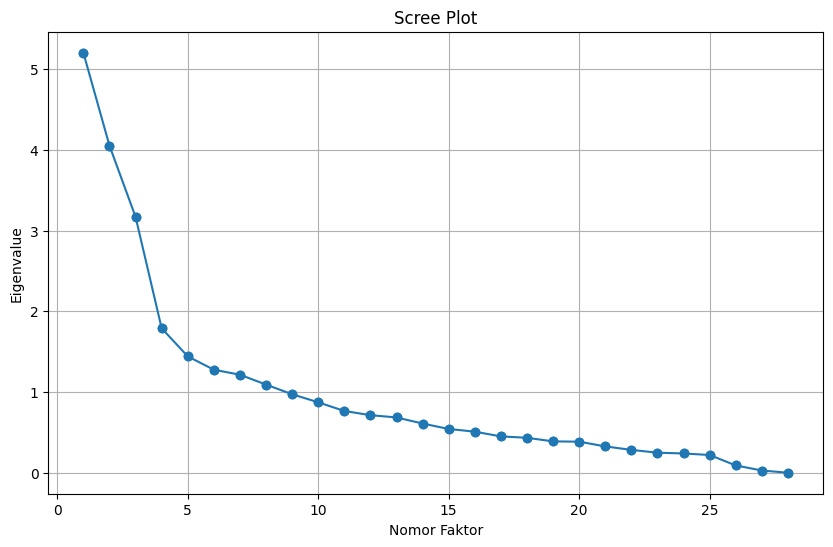

In [ ]:
# Buat objek FactorAnalyzer
fa = FactorAnalyzer()

# Fit model ke data
fa.fit(scaled_df.drop('Kepuasan Hidup', axis=1))

# Dapatkan eigenvalue
eigenvalues, _ = fa.get_eigenvalues()  # Unpack the tuple

# Plot scatter plot eigenvalue
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(eigenvalues) + 1), eigenvalues)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Nomor Faktor')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()


In [ ]:
# Mengakses array eigenvalues dari tuple
eigenvalues_array = eigenvalue

# Menghitung jumlah faktor yang memiliki eigenvalues lebih dari 1
n_factors = np.sum(eigenvalues_array >= 1)

# Menampilkan jumlah faktor yang signifikan
print("Jumlah faktor signifikan:", n_factors)


Jumlah faktor signifikan: 8


In [ ]:
eigenvalues_array = eigenvalue

# Menentukan jumlah faktor yang akan digunakan berdasarkan eigenvalues
n_factors = sum(eigenvalues_array >= 1)  # Hanya menggunakan faktor yang memiliki eigenvalue lebih dari 1

# Melakukan Analisis Faktor (Factor Analysis) dengan rotasi Varimax
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(scaled_df.drop('Kepuasan Hidup', axis=1))

# Mendapatkan loadings dari faktor
loadings = fa.loadings_

# Menampilkan loadings dalam DataFrame
loadings_df = pd.DataFrame(loadings, index=scaled_df.drop('Kepuasan Hidup', axis=1).columns,
                           columns=[f'Factor_{i+1}' for i in range(loadings.shape[1])])
print(loadings_df)


     Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  Factor_6  Factor_7  \
A.1  0.242271 -0.098852  0.019666 -0.041774  0.079318  0.081727  0.118730   
A.2 -0.353342  0.353974  0.200063  0.176223 -0.011273 -0.024590  0.084485   
A.3  0.149914 -0.216162 -0.035554 -0.154769 -0.017451  0.122610 -0.345613   
A.4  0.070036  0.006344  0.125038  0.131845  0.100497  0.095072  0.720333   
A.5  0.070727 -0.041558 -0.042048  0.063742  0.015535 -0.103616  0.037494   
A.6  0.265738 -0.070721 -0.176146 -0.212250 -0.007624  0.007214 -0.457509   
B.1 -0.097378 -0.000551  0.526003  0.102477 -0.044314  0.214595  0.229388   
B.2 -0.029636  0.021596  0.441540  0.036487 -0.057119  0.176416  0.202179   
C.1 -0.018535 -0.011287  0.186907  0.056414  0.908978  0.001701  0.109427   
C.2  0.131680  0.951421 -0.068362  0.144098 -0.061788  0.020977  0.044974   
C.3  0.033068  0.860621  0.027551  0.142280  0.475790 -0.005504  0.088060   
C.4  0.025815  0.767655 -0.117523  0.051460 -0.501916 -0.000938 -0.010307   

In [ ]:
# Menentukan faktor dominan untuk setiap variabel
dominant_factors = loadings_df.idxmax(axis=1)

print("\nDominant Factors:")
print(dominant_factors)


Dominant Factors:
A.1    Factor_8
A.2    Factor_2
A.3    Factor_8
A.4    Factor_7
A.5    Factor_1
A.6    Factor_1
B.1    Factor_3
B.2    Factor_3
C.1    Factor_5
C.2    Factor_2
C.3    Factor_2
C.4    Factor_2
D.1    Factor_6
D.2    Factor_6
D.3    Factor_3
D.4    Factor_4
D.5    Factor_4
E.1    Factor_3
E.2    Factor_3
E.3    Factor_3
F.1    Factor_1
F.2    Factor_1
F.3    Factor_1
F.4    Factor_1
F.5    Factor_1
F.6    Factor_1
F.7    Factor_1
F.8    Factor_1
dtype: object


In [ ]:
import pandas as pd

# Menyimpan hasil faktor dominan untuk setiap variabel
dominant_factors = loadings_data.idxmax(axis=1)

# Membuat DataFrame untuk menyimpan hasil faktor dominan
dominant_factors_table = pd.DataFrame(index=dominant_factors.unique(), columns=['Dominant Features'])

# Mengisi DataFrame dengan daftar fitur untuk setiap faktor dominan
for factor in dominant_factors.unique():
    features = dominant_factors[dominant_factors == factor].index.tolist()
    dominant_factors_table.loc[factor, 'Dominant Features'] = ", ".join(features)

# Menampilkan tabel
print(dominant_factors_table)


                                         Dominant Features
Factor_8                                          A.1, A.3
Factor_2                                A.2, C.2, C.3, C.4
Factor_7                                               A.4
Factor_1  A.5, A.6, F.1, F.2, F.3, F.4, F.5, F.6, F.7, F.8
Factor_3                      B.1, B.2, D.3, E.1, E.2, E.3
Factor_5                                               C.1
Factor_6                                          D.1, D.2
Factor_4                                          D.4, D.5


In [ ]:
# Factor      Nama Faktor                     Fitur Dominan               Deskripsi Fitur
# ------------------------------------------------------------------------------------------------
# Factor_8    Ketersediaan                    A.1, A.3                    Gender, Marital status
#             Hunian dan Pendapatan

# Factor_2    Usia dan tanggungan             A.2, C.2, C.3, C.4          Age, Dependency ratio: Number of not working family members, Dependency ratio: family members, Dependency ratio: dependency ratio

# Factor_7    Karakteristik                   A.4                         Educational background
#             Demografi

# Factor_1    Pekerjaan dan                   A.5, A.6, F.1, F.2, F.3,    Religion, Occupation, Your life will be much better if you work not become a commuter, You don't have enough time to do social interaction in your neighborhood, Your quality as a parent is disturbed because you do not have enough time to interact with your child, You don't have time to think about yourself, Your family life is disrupted because you do not have enough time to interact with your partner, Your overall life satisfaction as a commuter is reduced because you no longer have much time, You feel that you have individuals stress with activities as a commuter, Even though your work is within reasonable limits but the time you allocate to travel as a commuter
#             Kepuasan Hidup                  F.4, F.5, F.6, F.7, F.8

# Factor_3    Kelayakan Hunian                B.1, B.2, D.3, E.1, E.2,    Housing: Affordability of housing costs, Housing: House eligibility, Income: Income as a commuter is more bigger, Income: Work time compliance with income, Accessibility of Destination City: Ease of transportation mode, Accessibility of Destination City: Comfort travel to work locations, Accessibility of Destination City: Fairness travel time to work location
#             dan Aksesibilitas               E.3

# Factor_5    Pekerjaan dan                   C.1                         Dependency ratio: Number of working family members
#             Keluarga

# Factor_6    Latar Belakang                  D.1, D.2                    Income: Income as a commuter is more bigger, Income: Income as a commuter is worthy
#             Pendidikan

# Factor_4    Pendapatan                      D.4, D.5                    Income: Income per month (IDR), Income: Income per month (USD)


In [ ]:
# Mendapatkan skor faktor
factor_scores = fa.transform(scaled_df.drop('Kepuasan Hidup', axis=1))

# Menyimpan skor faktor dalam DataFrame
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor_{i+1}' for i in range(n_factors)])
print("Factor Scores:")
print(factor_scores_df.head())

Factor Scores:
   Factor_1  Factor_2  Factor_3  Factor_4  Factor_5  Factor_6  Factor_7  \
0  0.760770 -0.936531  0.903476  0.241983 -1.050919  0.231682  0.291708   
1  1.377190  0.352634  1.728596 -1.092378  0.374616 -0.196632 -0.552296   
2  0.806367  0.063428  1.124199 -0.171092 -1.126744 -0.805470 -0.308310   
3  1.792320  0.213988  1.235471 -0.558151  0.468598  0.222058 -0.764137   
4  1.488475  0.637239  1.667156 -1.027385  1.644646  0.853995 -0.751726   

   Factor_8  
0 -0.847490  
1  0.061796  
2 -0.105706  
3  0.701851  
4  2.035903  


In [ ]:
factor_scores_df.shape

(636, 8)

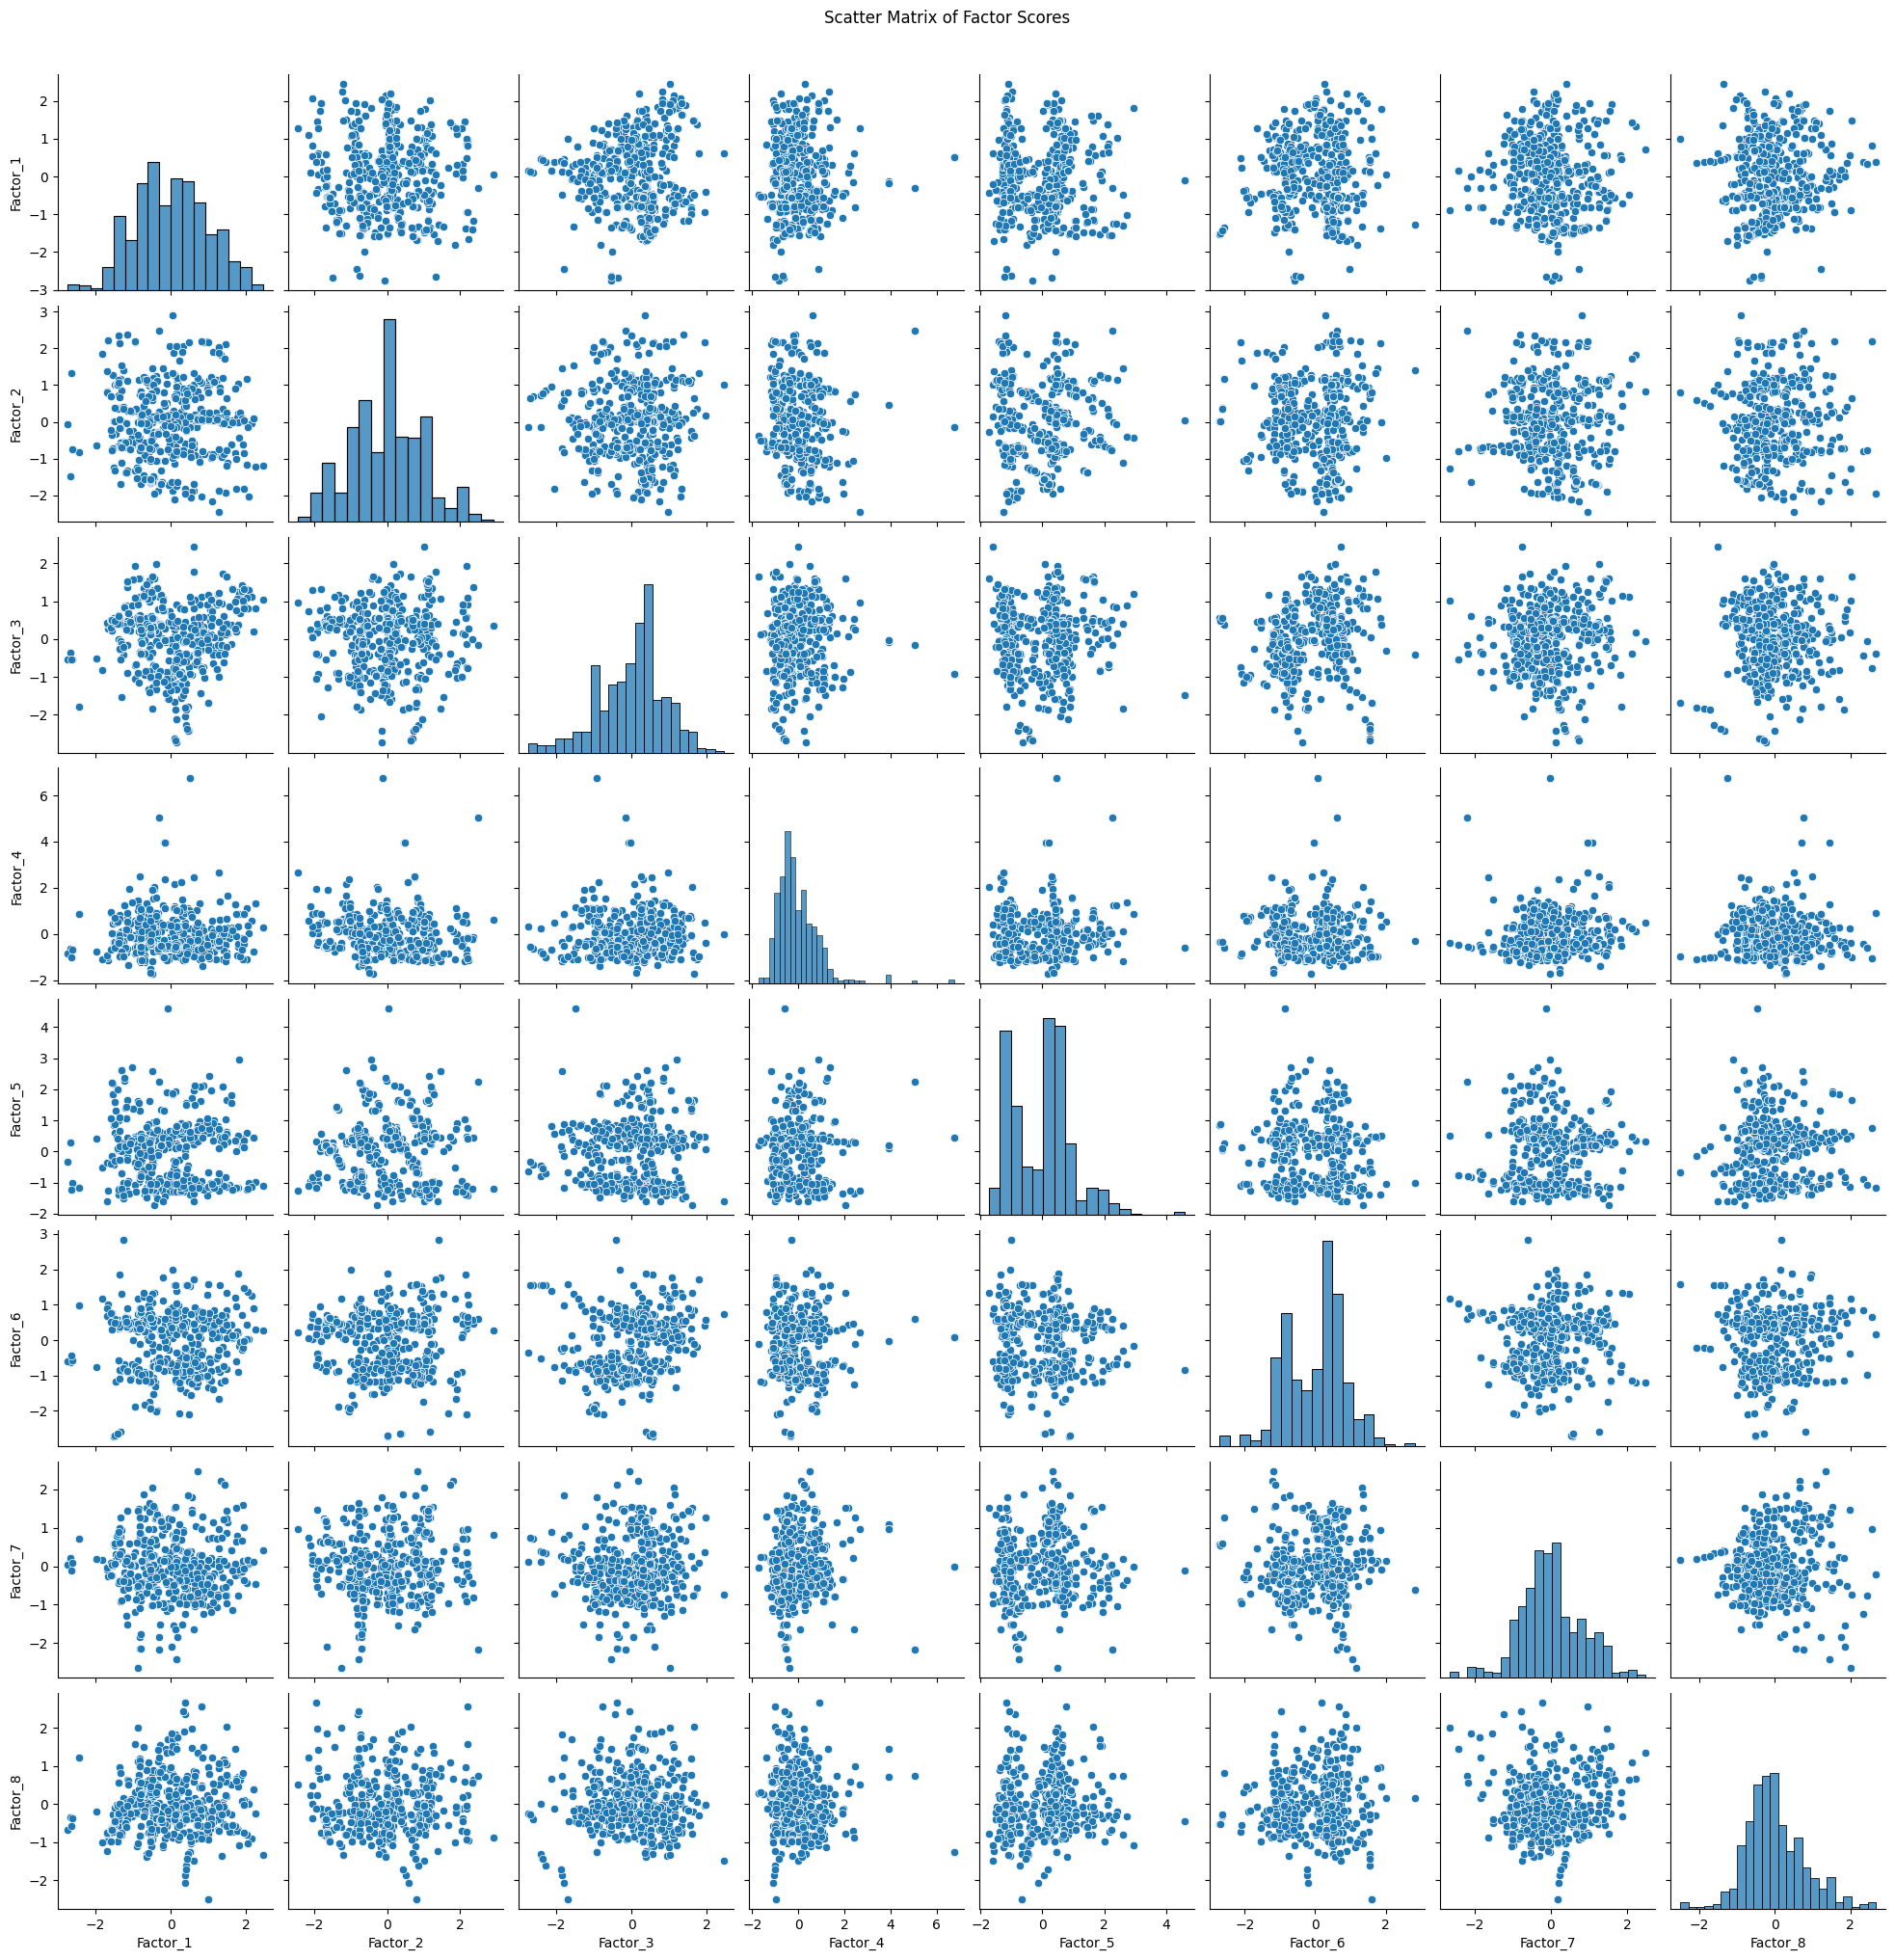

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatter plots for pairs of factors
def plot_scatter_matrix(factor_scores_df, factors):
    sns.pairplot(factor_scores_df[factors])
    plt.suptitle('Scatter Matrix of Factor Scores', y=1.02)
    plt.show()

# List of factors to plot
factors = [f'Factor_{i+1}' for i in range(n_factors)]

# Create scatter plots
plot_scatter_matrix(factor_scores_df, factors)


In [ ]:
scaled_df['Kepuasan Hidup'].shape

(636,)

In [ ]:
# Mendapatkan skor faktor
factor_scores = fa.transform(scaled_df.drop('Kepuasan Hidup', axis=1))

# Menyimpan skor faktor dalam DataFrame
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor_{i+1}' for i in range(n_factors)])
print("Factor Scores:")
factor_scores_df

# Menambahkan kembali kolom target
factor_scores_df['Kepuasan Hidup'] = scaled_df['Kepuasan Hidup'].values

# Mendapatkan variance explained dan cumulative variance
variance_explained = fa.get_factor_variance()
variance_df = pd.DataFrame({
    'Factor': [f'Factor_{i+1}' for i in range(n_factors)],
    'Variance Explained': variance_explained[0],
    'Cumulative Variance': variance_explained[1]
})
print("Variance Explained and Cumulative Variance:")
variance_df


Factor Scores:
Variance Explained and Cumulative Variance:


,Factor,Variance Explained,Cumulative Variance
0,Factor_1,4.609477,0.164624
1,Factor_2,2.523784,0.090135
2,Factor_3,2.349162,0.083899
3,Factor_4,2.201009,0.078607
4,Factor_5,1.396194,0.049864
5,Factor_6,1.318556,0.047091
6,Factor_7,1.190864,0.042531
7,Factor_8,0.820232,0.029294


Berikut adalah hipotesis untuk setiap faktor dalam Analisis Faktor-Faktor yang Mempengaruhi Kepuasan Hidup Komuter di Indonesia:

1. **Karakteristik Demografi (Factor_7)**:
   - h0: Tidak ada hubungan antara karakteristik demografi (gender, status pernikahan, agama) dengan tingkat kepuasan hidup komuter di Indonesia.
   - h1: Terdapat hubungan antara karakteristik demografi (gender, status pernikahan, agama) dengan tingkat kepuasan hidup komuter di Indonesia.

2. **Usia dan Tanggungan (Factor_2)**:
   - h0: Tidak ada hubungan antara usia dan tanggungan dengan tingkat kepuasan hidup komuter di Indonesia.
   - h1: Terdapat hubungan antara usia dan tanggungan dengan tingkat kepuasan hidup komuter di Indonesia.

3. **Latar Belakang Pendidikan (Factor_6)**:
   - h0: Tidak ada hubungan antara latar belakang pendidikan dengan tingkat kepuasan hidup komuter di Indonesia.
   - h1: Terdapat hubungan antara latar belakang pendidikan dengan tingkat kepuasan hidup komuter di Indonesia.

4. **Pekerjaan dan Kepuasan Hidup (Factor_1)**:
   - h0: Tidak ada hubungan antara pekerjaan dan aspek-aspek tertentu dari kehidupan kerja dengan tingkat kepuasan hidup sebagai komuter di Indonesia.
   - h1: Terdapat hubungan antara pekerjaan dan aspek-aspek tertentu dari kehidupan kerja dengan tingkat kepuasan hidup sebagai komuter di Indonesia.

5. **Ketersediaan Hunian dan Pendapatan (Factor_8)**:
   - h0: Tidak ada hubungan antara ketersediaan hunian dan pendapatan dengan tingkat kepuasan hidup komuter di Indonesia.
   - h1: Terdapat hubungan antara ketersediaan hunian dan pendapatan dengan tingkat kepuasan hidup komuter di Indonesia.

6. **Kelayakan Hunian dan Aksesibilitas (Factor_3)**:
   - h0: Tidak ada hubungan antara kelayakan hunian dan tingkat aksesibilitas dengan tingkat kepuasan hidup komuter di Indonesia.
   - h1: Terdapat hubungan antara kelayakan hunian dan tingkat aksesibilitas dengan tingkat kepuasan hidup komuter di Indonesia.

7. **Pekerjaan dan Keluarga (Factor_5)**:
   - h0: Tidak ada hubungan antara pekerjaan dan peran keluarga dengan tingkat kepuasan hidup komuter di Indonesia.
   - h1: Terdapat hubungan antara pekerjaan dan peran keluarga dengan tingkat kepuasan hidup komuter di Indonesia.

8. **Pendapatan (Factor_4)**:
   - h0: Tidak ada hubungan antara pendapatan dengan tingkat kepuasan hidup komuter di Indonesia.
   - h1: Terdapat hubungan antara pendapatan dengan tingkat kepuasan hidup komuter di Indonesia.

In [ ]:
x = factor_scores_df.drop('Kepuasan Hidup', axis=1)
y = factor_scores_df['Kepuasan Hidup']

In [ ]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
mnlogit_mod = sm.MNLogit(y_train, sm.add_constant(X_train))
mnlogit_fit = mnlogit_mod.fit(method='bfgs')

print(mnlogit_fit.summary())

         Current function value: 0.577400
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                          MNLogit Regression Results                          
Dep. Variable:         Kepuasan Hidup   No. Observations:                  508
Model:                        MNLogit   Df Residuals:                      490
Method:                           MLE   Df Model:                           16
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.4740
Time:                        04:18:09   Log-Likelihood:                -293.32
converged:                      False   LL-Null:                       -557.60
Covariance Type:            nonrobust   LLR p-value:                3.087e-102
Kepuasan Hidup=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5873      0.168      3.499      0.000    

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Koefisien (coef): Ini menunjukkan seberapa besar perubahan dalam log-odds dari variabel dependen yang terkait dengan satu unit perubahan dalam variabel independen yang bersangkutan. Misalnya, untuk "Factor_1" di kategori "Kepuasan Hidup=2", koefisien adalah -1.6032. Ini berarti bahwa setiap peningkatan satu unit dalam "Factor_1" akan mengurangi log-odds dari kepuasan hidup kategori 2 sebesar 1.6032.

Kesalahan Standar (std err): Ini adalah perkiraan standar deviasi dari koefisien. Ini memberikan indikasi seberapa akurat perkiraan koefisien tersebut.

Statistik z: Ini adalah nilai statistik z yang dihitung dari koefisien dan kesalahan standar. Ini digunakan untuk menguji signifikansi statistik dari koefisien. Semakin tinggi nilainya, semakin signifikan koefisien tersebut.

Nilai p (P>|z|): Ini adalah nilai p yang terkait dengan tes hipotesis bahwa koefisien adalah nol. Nilai p yang lebih kecil dari tingkat signifikansi yang dipilih menunjukkan bahwa koefisien tersebut signifikan secara statistik.

Interval Kepercayaan: Ini adalah rentang kepercayaan untuk koefisien. Rentang ini memberikan perkiraan dari mana sebagian besar nilai koefisien akan jatuh dengan tingkat kepercayaan tertentu (biasanya 95%).

In [ ]:

# from sklearn.model_selection import GridSearchCV
# logreg = LogisticRegression()

# # Menentukan parameter yang akan di-tuning
# param_grid = {
#     'C': [0.1, 1, 10, 100, 1000],
#     'solver': ['liblinear', 'saga'],
#     'penalty': ['l1', 'l2']
# }

# # Melakukan Grid Search
# grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# print("Best Hyperparameters:", grid_search.best_params_)

# # Menggunakan model dengan hyperparameter terbaik untuk prediksi
# best_logreg = grid_search.best_estimator_
# y_pred = best_logreg.predict(X_test)

# # Evaluasi model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
logistic_regresion = LogisticRegression(multi_class='auto').fit(x,y)
y_pred = logistic_regresion.predict(X_test)
y_pred

array([2, 3, 2, 1, 1, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1,
       1, 1, 3, 2, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 2, 2, 2, 2, 1, 3, 2, 2,
       1, 2, 3, 1, 1, 1, 3, 2, 2, 2, 2, 1, 2, 3, 1, 2, 3, 3, 2, 1, 3, 2,
       3, 1, 2, 1, 1, 2, 2, 2, 3, 1, 3, 1, 3, 3, 2, 3, 2, 3, 1, 3, 2, 3,
       2, 1, 3, 3, 2, 1, 3, 3, 3, 1, 1, 3, 2, 3, 2, 2, 1, 2, 1, 3, 1, 3,
       2, 3, 3, 3, 3, 3, 1, 3, 2, 1, 1, 2, 3, 3, 2, 2, 1, 2])

In [ ]:
print('Intercept :', logistic_regresion.intercept_)

Intercept : [-0.09251687  0.61660425 -0.52408738]


In [ ]:
print(logistic_regresion.coef_)

[[ 1.79546406  0.27200667  0.53613938  0.47185515 -0.03032402  0.51349348
   0.08266486  1.15222008]
 [ 0.35112223  0.09612799 -0.1318325   0.41513638  0.16295696 -0.48667611
  -0.02319486 -0.09814398]
 [-2.14658629 -0.36813466 -0.40430687 -0.88699153 -0.13263294 -0.02681738
  -0.05947001 -1.0540761 ]]


In [ ]:
prediction_test = logistic_regresion.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(y_test, y_pred)))

Accuracy: 0.80
Error rate: 0.20


In [ ]:
!pip install scikit-plot

[[27  5  0]
 [ 8 34  6]
 [ 5  1 42]]
Akurasi: 0.8046875
Laporan Klasifikasi:
               precision    recall  f1-score   support

           1       0.68      0.84      0.75        32
           2       0.85      0.71      0.77        48
           3       0.88      0.88      0.88        48

    accuracy                           0.80       128
   macro avg       0.80      0.81      0.80       128
weighted avg       0.82      0.80      0.81       128

Confussion Matriks:
 [[27  5  0]
 [ 8 34  6]
 [ 5  1 42]]


<Axes: title={'center': 'Confussion Matriks'}, xlabel='Predicted label', ylabel='True label'>

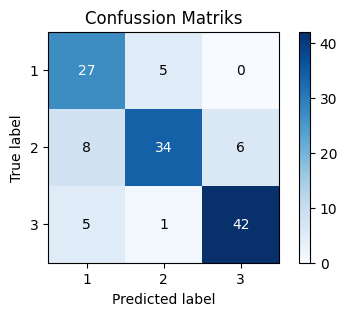

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import scikitplot as skplt
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))
print("Confussion Matriks:\n", confusion_matrix(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confussion Matriks',figsize=(5,3))